In [392]:
import numpy as np
import pandas as pd
import re,math
import matplotlib.pyplot as plt
from scipy.optimize import linprog


np.set_printoptions(suppress=True)
data1 = pd.read_csv(r'BCHAIN-MKPRU.csv') # B
data2 = pd.read_csv(r'LBMA-GOLD.csv') # G


In [393]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

In [394]:
data1

,Date,Value
0,9/11/16,621.65
1,9/12/16,609.67
2,9/13/16,610.92
3,9/14/16,608.82
4,9/15/16,610.38
...,...,...
1821,9/6/21,51769.06
1822,9/7/21,52677.40
1823,9/8/21,46809.17
1824,9/9/21,46078.38


In [395]:
data1.isnull().any()

Date     False
Value    False
dtype: bool

In [396]:
data2

,Date,USD (PM)
0,9/12/16,1324.60
1,9/13/16,1323.65
2,9/14/16,1321.75
3,9/15/16,1310.80
4,9/16/16,1308.35
...,...,...
1260,9/6/21,1821.60
1261,9/7/21,1802.15
1262,9/8/21,1786.00
1263,9/9/21,1788.25


In [397]:
# 线性插值填充
data2.interpolate(method='linear', limit_direction='backward', axis=0, inplace = True)

In [398]:
def amplitude(list_1): # 涨幅跌幅计算函数
    x1 = list_1.copy()[1:]
    x2 = list_1.copy()[:-1]
    y = (x1 - x2)/x2
    return y

In [399]:
# 比特币日涨幅
day_b_amp = amplitude(np.array(data1["Value"]))
pd.DataFrame(day_b_amp).T.to_csv("比特币日涨幅.csv")
day_b_amp_b = pd.concat([pd.DataFrame(np.array(data1["Date"])[1:],columns=["Date"]), pd.DataFrame(day_b_amp)],axis=1)
day_b_amp

array([-0.01927129,  0.00205029, -0.00343744, ..., -0.11139939,
       -0.01561211,  0.00630035])

In [400]:
# 黄金日涨幅
day_amp = amplitude(np.array(data2["USD (PM)"]))
pd.DataFrame(day_amp).T.to_csv("黄金日涨幅.csv")
day_g_amp_g = pd.concat([pd.DataFrame(np.array(data2["Date"])[1:],columns=["Date"]), pd.DataFrame(day_amp)],axis=1)
day_amp

array([-0.0007172 , -0.00143542, -0.00828447, ..., -0.00896152,
        0.0012598 ,  0.00355096])

In [401]:
pd.DataFrame(np.array(data2["Date"][1:]),columns=["Date"])

,Date
0,9/13/16
1,9/14/16
2,9/15/16
3,9/16/16
4,9/19/16
...,...
1259,9/6/21
1260,9/7/21
1261,9/8/21
1262,9/9/21


In [402]:
pd.DataFrame(day_amp)

,0
0,-0.000717
1,-0.001435
2,-0.008284
3,-0.001869
4,0.004968
...,...
1259,-0.001152
1260,-0.010677
1261,-0.008962
1262,0.001260


In [403]:
# 黄金全投夏普比率
SRg = []
SRb = []
cct = pd.concat([pd.DataFrame(np.array(data2["Date"][1:]),columns=["Date"]), pd.DataFrame(day_amp)],axis=1).set_index(["Date"])
y1 = cct[0:77]
y2 = cct[77:329]
y3 = cct[329:582]
y4 = cct[582:835]
y5 = cct[835:1089]
y6 = cct[1089:]
y = [y1,y2,y3,y4,y5,y6]
# ym_l = []
# yd_l = []
for i in y:
    ym = np.array(i).mean()
    yd = np.std(np.array(i),ddof = 1)
    SRg.append(ym/yd)
#     ym_l.append(ym)
#     yd_l.append(yd)
# fig = plt.figure( figsize=(16,4), dpi=100)
# ax = fig.add_subplot(1,1,1)
# x = np.array([i+1 for i in range(6)])
# plot = ax.plot( x, ym_l, color=g_hex, linewidth=2, linestyle='-',label='mean' )
# plot = ax.plot( x, yd_l, color=o_hex, linewidth=2, linestyle='-',label='std' )
# ax.set_xticks( range(0,len(x),100))
# plt.xlabel('x',fontsize=20)
# plt.ylabel('y',fontsize=20)
# plt.title('title',fontsize=25)
# ax.legend( loc=0, frameon=True )
# # plt.savefig('黄金交易图.png',dpi=600)
# plt.show()
# pd.DataFrame([ym_l,yd_l],columns=[i+1 for i in range(6)],index=["mean", "std"])

In [404]:
# 比特币全投夏普比率
cct = pd.concat([pd.DataFrame(np.array(data1["Date"][1:]),columns=["Date"]), pd.DataFrame(day_b_amp)],axis=1).set_index(["Date"])
y1 = cct[0:111]
y2 = cct[111:476]
y3 = cct[476:841]
y4 = cct[841:1206]
y5 = cct[1206:1572]
y6 = cct[1572:]
y = [y1,y2,y3,y4,y5,y6]
# ym_l = []
# yd_l = []
for i in y:
    ym = np.array(i).mean()
    yd = np.std(np.array(i),ddof = 1)
    SRb.append(ym/yd)
#     ym_l.append(ym)
#     yd_l.append(yd)
# fig = plt.figure( figsize=(16,4), dpi=100)
# ax = fig.add_subplot(1,1,1)
# x = np.array([i+1 for i in range(6)])
# plot = ax.plot( x, ym_l, color=g_hex, linewidth=2, linestyle='-',label='mean' )
# plot = ax.plot( x, yd_l, color=o_hex, linewidth=2, linestyle='-',label='std' )
# ax.set_xticks( range(0,len(x),100))
# plt.xlabel('x',fontsize=20)
# plt.ylabel('y',fontsize=20)
# plt.title('title',fontsize=25)
# ax.legend( loc=0, frameon=True )
# # plt.savefig('黄金交易图.png',dpi=600)
# plt.show()
# pd.DataFrame([ym_l,yd_l],columns=[i+1 for i in range(6)],index=["mean", "std"])

In [405]:
print(SRg)
print(SRb)

[-0.2128062657427464, 0.07524090768958894, -0.008487256419823732, 0.09779287961781746, 0.07839439351589454, -0.03615613018594472]
[0.24361905614827226, 0.1725218418196826, -0.06911252562116423, 0.06626759793528327, 0.11729362378441305, 0.06379987362486464]


In [406]:
# SR037 = []
# # 3:7
# day_03_g_amp = day_amp*0.3
# day_07_b_amp = day_b_amp*0.7
# cct = pd.concat([pd.DataFrame(np.array(data2["Date"][1:]),columns=["Date"]), pd.DataFrame(day_03_g_amp)],axis=1).set_index(["Date"])
# y1 = cct[0:77]
# y2 = cct[77:329]
# y3 = cct[329:582]
# y4 = cct[582:835]
# y5 = cct[835:1089]
# y6 = cct[1089:]
# y037g = [y1,y2,y3,y4,y5,y6]
# cct = pd.concat([pd.DataFrame(np.array(data1["Date"][1:]),columns=["Date"]), pd.DataFrame(day_07_b_amp)],axis=1).set_index(["Date"])
# y1 = cct[0:111]
# y2 = cct[111:476]
# y3 = cct[476:841]
# y4 = cct[841:1206]
# y5 = cct[1206:1572]
# y6 = cct[1572:]
# y037b = [y1,y2,y3,y4,y5,y6]
# y = []
# for i,j in zip(y037g,y037b):
#     y.append(i+i)
# for i in y:
#     ym = np.array(i).mean()
#     yd = np.std(np.array(i),ddof = 1)
#     SR037.append(ym/yd)

In [407]:
# 5:5
SR055 = []
day_05_g_amp = day_amp*0.5
day_05_b_amp = day_b_amp*0.5
cct = pd.concat([pd.DataFrame(np.array(data2["Date"][1:]),columns=["Date"]), pd.DataFrame(day_05_g_amp)],axis=1).set_index(["Date"])
y1 = cct[0:77]
y2 = cct[77:329]
y3 = cct[329:582]
y4 = cct[582:835]
y5 = cct[835:1089]
y6 = cct[1089:]
y055g = [y1,y2,y3,y4,y5,y6]
cct = pd.concat([pd.DataFrame(np.array(data1["Date"][1:]),columns=["Date"]), pd.DataFrame(day_05_b_amp)],axis=1).set_index(["Date"])
y1 = cct[0:111]
y2 = cct[111:476]
y3 = cct[476:841]
y4 = cct[841:1206]
y5 = cct[1206:1572]
y6 = cct[1572:]
y055b = [y1,y2,y3,y4,y5,y6]
y = []
for i,j in zip(y055g,y055b):
    y.append(i+i)
for i in y:
    ym = np.array(i).mean()
    yd = np.std(np.array(i),ddof = 1)
    SR055.append(ym/yd)
print(SR055)

[-0.2128062657427464, 0.07524090768958894, -0.008487256419823732, 0.09779287961781746, 0.07839439351589454, -0.03615613018594472]


In [408]:
# # 7:3
# SR073 = []
# day_07_g_amp = day_amp*0.7
# day_03_b_amp = day_b_amp*0.3
# cct = pd.concat([pd.DataFrame(np.array(data2["Date"][1:]),columns=["Date"]), pd.DataFrame(day_07_g_amp)],axis=1).set_index(["Date"])
# y1 = cct[0:77]
# y2 = cct[77:329]
# y3 = cct[329:582]
# y4 = cct[582:835]
# y5 = cct[835:1089]
# y6 = cct[1089:]
# y073g = [y1,y2,y3,y4,y5,y6]
# cct = pd.concat([pd.DataFrame(np.array(data1["Date"][1:]),columns=["Date"]), pd.DataFrame(day_03_b_amp)],axis=1).set_index(["Date"])
# y1 = cct[0:111]
# y2 = cct[111:476]
# y3 = cct[476:841]
# y4 = cct[841:1206]
# y5 = cct[1206:1572]
# y6 = cct[1572:]
# y073b = [y1,y2,y3,y4,y5,y6]
# y = []
# for i,j in zip(y073g,y073b):
#     y.append(i+i)
# for i in y:
#     ym = np.array(i).mean()
#     yd = np.std(np.array(i),ddof = 1)
#     SR073.append(ym/yd)

In [409]:
# print(SR037)
# print(SR055)
# print(SR073)

In [410]:
# 合并两组数据
temp = []
for i in np.array(data2["Date"]):
    if i in np.array(data1["Date"]):
        temp.append(i)
temp1 = [] # 拼接日期
for i in temp:
    c = data1[data1["Date"] == i]
    temp1.append(c)
new_data1 = pd.concat(temp1)# 新的比特币数据
# 组合一起
merge1 = pd.merge(new_data1,data2,how='left',on='Date')
merge1 = merge1.set_index(["Date"])
merge1

,Value,USD (PM)
Date,,
9/12/16,609.67,1324.60
9/13/16,610.92,1323.65
9/14/16,608.82,1321.75
9/15/16,610.38,1310.80
9/16/16,609.11,1308.35
...,...,...
9/6/21,51769.06,1821.60
9/7/21,52677.40,1802.15
9/8/21,46809.17,1786.00


In [411]:
# 皮尔森相关系数
merge1.corr('pearson')

,Value,USD (PM)
Value,1.00000,0.65017
USD (PM),0.65017,1.00000


In [412]:
# 斯皮尔曼相关系数
merge1.corr('spearman')

,Value,USD (PM)
Value,1.000000,0.787329
USD (PM),0.787329,1.000000


In [413]:
# 相关系数
merge1.corr('kendall')

,Value,USD (PM)
Value,1.000000,0.559164
USD (PM),0.559164,1.000000


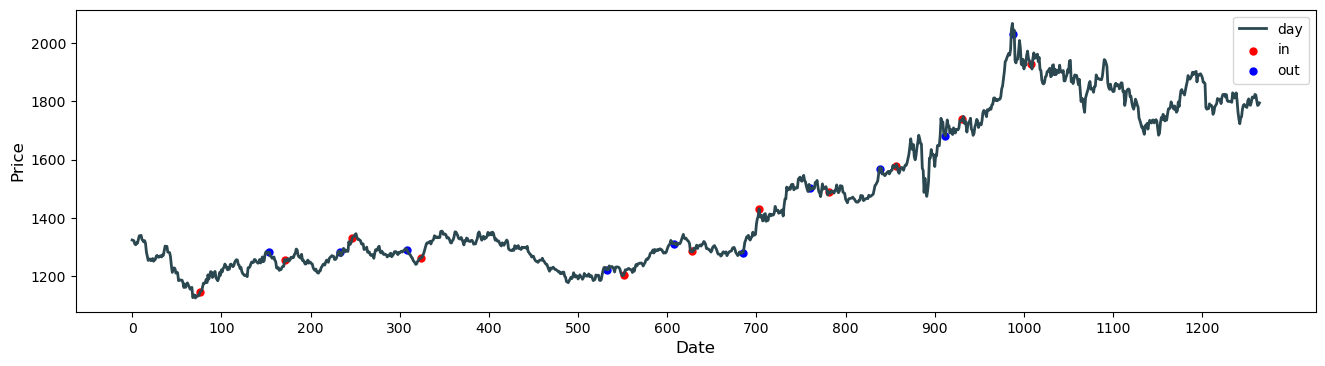

(19, 4, ([(76, -1, 1145.9), (154, 1, 1281.85), (171, -1, 1257.4), (233, 1, 1282.3), (247, -1, 1333.1), (308, 1, 1291.85), (324, -1, 1264.55), (532, 1, 1223.0), (551, -1, 1203.25), (608, 1, 1312.4), (628, -1, 1285.85), (685, 1, 1280.95), (703, -1, 1431.4), (760, 1, 1503.1), (781, -1, 1490.6), (839, 1, 1567.85), (856, -1, 1578.25), (912, 1, 1682.05), (931, -1, 1737.95), (988, 1, 2031.15), (1008, -1, 1928.45)], 83270.07449418739))


In [414]:

def gold(short_item, long_item,score, a):
    # 周黄金平均值
    count = 1
    temp3 = []
    while True:
        tp = data2.iloc[short_item*(count-1): short_item*count]["USD (PM)"].mean()
        count+= 1
        temp3.append(tp)
        if count >= len(data2)/short_item:
            break
    temp3_df = pd.DataFrame(temp3) # 252周的金价
    # 周平均金价图
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = temp3_df.index
#     y = temp3_df.values
#     plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='week' )
#     ax.set_xticks( range(0,len(x),10))
#     ax.legend( loc=0, frameon=True )











    # 长期(20天)
    count = 1
    temp4_max = [] # 周高位点
    temp4_min = [] # 周低位点
    while True:
        tp_max = max(temp3[(count-1)*long_item:count*long_item])
        tp_min = min(temp3[(count-1)*long_item:count*long_item])
        temp4_max.append(tp_max)
        temp4_min.append(tp_min)
        count+=1
        if count >= len(temp3)/long_item:
            break
    temp4_max_h = amplitude(np.array(temp4_max)) # 周高位点
    temp4_min_l = amplitude(np.array(temp4_min)) # 周低位点
    #周趋势(同增同减同趋势，不同则未知)
    tptp = []
    for i,j in zip(temp4_max_h, temp4_min_l):
        if i > 0 and j > 0:
            tptp.append(1)
        elif i < 0 and j < 0:
            tptp.append(-1)
        else:
            tptp.append(0)
    tptp_w_g = pd.DataFrame(tptp) # 第二周开始的61周涨跌幅度表 -1跌+1涨
    #周趋势图(长期)
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = tptp_w_g.index
#     y = tptp_w_g.values
#     plot = ax.plot( x, y,"r*", color=dt_hex )
#     ax.set_xticks( range(2,len(x),10))
    # ax.legend( loc=0, frameon=True )
    # plt.show()









    # # (15天)
    # count = 1
    # temp5_max = []
    # temp5_min = []
    # temp5_max_index = []
    # temp5_min_index = []
    # while True:
    #     tp_max = max(np.array(data2["USD (PM)"])[(count-1)*15:count*15])
    #     tp_min = min(np.array(data2["USD (PM)"])[(count-1)*15:count*15])
    #     temp5_max_index.append((count-1)*15+list(np.array(data2["USD (PM)"])[(count-1)*15:count*15]).index(tp_max))
    #     temp5_min_index.append((count-1)*15+list(np.array(data2["USD (PM)"])[(count-1)*15:count*15]).index(tp_min))
    #     temp5_max.append(tp_max)
    #     temp5_min.append(tp_min)
    #     count+=1
    #     if count >= len(data2)/15:
    #         break
    # temp5_max_h = amplitude(np.array(temp5_max))
    # temp5_min_l = amplitude(np.array(temp5_min))
    # #天趋势
    # tptp = []
    # temp5_max_value = []
    # temp5_min_value = []
    # temp5_max_index_real = []
    # temp5_min_index_real = []
    # count = 0
    # for i,j in zip(temp5_max_h, temp5_min_l):
    #     if i > 0 and j > 0:
    #         tptp.append(1)
    #         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
    #         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
    #         temp5_max_index_real.append(temp5_max_index[count])
    #         temp5_min_index_real.append(temp5_min_index[count])
    #     elif i < 0 and j < 0:
    #         tptp.append(-1)
    #         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
    #         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
    #         temp5_max_index_real.append(temp5_max_index[count])
    #         temp5_min_index_real.append(temp5_min_index[count])
    #     else:
    #         tptp.append(0)
    #     count += 1
    # tptp_d = pd.DataFrame(tptp)
    # # 点图
    # fig = plt.figure( figsize=(16,4), dpi=100)
    # ax = fig.add_subplot(1,1,1)
    # x = tptp_d.index
    # y = tptp_d.values
    # plot = ax.plot( x, y,"r*", color=dt_hex )
    # ax.set_xticks( range(2,len(x),10))
    # plt.show()
    # # 折线描点图
    # fig = plt.figure( figsize=(16,4), dpi=100)
    # ax = fig.add_subplot(1,1,1)
    # x = np.array(data2.index)[0:200]
    # y = np.array(data2["USD (PM)"])[0:200]
    # plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
    # plt.scatter(temp5_max_index_real[0:12], temp5_max_value[0:12], s=25, c='r') 
    # plt.scatter(temp5_min_index_real[0:12], temp5_min_value[0:12], s=25, c='b') 
    # ax.set_xticks( range(0,len(x),30))
    # plt.xlabel('x',fontsize=20)
    # plt.ylabel('y',fontsize=20)
    # plt.title('title',fontsize=25)
    # ax.legend( loc=0, frameon=True )
    # plt.savefig('天周期点图.png',dpi=600)
    # plt.show()





















    # 5天(一周趋势)
    count = 1
    temp5_max = []
    temp5_min = []
    # temp5_max_index = []
    # temp5_min_index = []
    while True:
        tp_max = max(np.array(data2["USD (PM)"])[(count-1)*short_item:count*short_item])
        tp_min = min(np.array(data2["USD (PM)"])[(count-1)*short_item:count*short_item])
    #     temp5_max_index.append((count-1)*5+list(np.array(data2["USD (PM)"])[(count-1)*5:count*5]).index(tp_max))
    #     temp5_min_index.append((count-1)*5+list(np.array(data2["USD (PM)"])[(count-1)*5:count*5]).index(tp_min))
        temp5_max.append(tp_max)
        temp5_min.append(tp_min)
        count+=1
        if count >= len(data2)/short_item:
            break
    temp5_max_h = amplitude(np.array(temp5_max))
    temp5_min_l = amplitude(np.array(temp5_min))
    #
    tptp = []
    # temp5_max_value = []
    # temp5_min_value = []
    # temp5_max_index_real = []
    # temp5_min_index_real = []
    count = 0
    for i,j in zip(temp5_max_h, temp5_min_l):
        if i > 0 and j > 0:
            tptp.append(1)
    #         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
    #         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
    #         temp5_max_index_real.append(temp5_max_index[count])
    #         temp5_min_index_real.append(temp5_min_index[count])
        elif i < 0 and j < 0:
            tptp.append(-1)
    #         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
    #         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
    #         temp5_max_index_real.append(temp5_max_index[count])
    #         temp5_min_index_real.append(temp5_min_index[count])
        else:
            tptp.append(0)
        count += 1
    tptp_5 = pd.DataFrame(tptp)
    #
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = tptp_5.index
#     y = tptp_5.values
#     plot = ax.plot( x, y,"r*", color=dt_hex )
#     ax.set_xticks( range(2,len(x),10))
    # plt.show()














    # 第一个20天
    # 买入-1 卖出+1
    status = 0 # 上一周的涨跌
    #day_amp  黄金日涨幅
    status_dict = [] # (日期，买入还是卖出)
    day = 0
    for i in range(long_item):
        if i == 0: # 第二周
            status_first_5 = np.array(tptp_w_g)[0][0]
            if status_first_5 < 0:
                status = -1 # 跌
            elif status_first_5 > 0:
                status = 1 # 涨
            else:
                status = 0 
        else: # 第三周以后20天以内
            for j in range(short_item):
                day = short_item*i+j+short_item-1
                if status_dict == []: # 没有任何买入时
                    if status == 1:
                        status = np.array(tptp_w_g)[i-1][0]
                        continue
                    elif status == -1 and day_amp[day-1] > 0:
                        status_dict.append((day, -1, np.array(data2)[day][1])) # 买入
                        status = np.array(tptp_w_g)[i-1][0]
                        break
                else: # 有买入后
                    #  上周涨跌判断      本周每日涨跌幅        上笔交易买卖情况   
                    if status == -1 and day_amp[day-1] > 0 and status_dict[-1][1] >= 0: # 上一笔是卖出才能买入
                        status_dict.append((day, -1, np.array(data2)[day][1])) # 买入
                        status = np.array(tptp_w_g)[i-1][0]
                        break
                    elif status == -1 and day_amp[day-1] < 0 and status_dict[-1][1] <= 0: # 上一笔是买入才能卖出
                        status_dict.append((day, 1, np.array(data2)[day][1])) # 卖出
                        status = np.array(tptp_w_g)[i-1][0]
                        break
    # status_dict









    # # 模拟
    # score = 10000
    # ans = 0 #  手里黄金的盎司
    # for i in status_dict:
    #     ans = ans-(score/(1.01*np.array(data2)[i[0]][1]*i[1]))
    # #     score = score+np.array(data2)[i[0]][1]*i[1] #i[0]*np.array(data2)[i[0]][1]*0.01
    # ans*np.array(data2)[19][1] # 第26天














    # 第二个月以及后面
    for k in range(len(tptp_w_g)):
        if np.array(tptp_w_g)[k][0] == 0:
            status = np.array(tptp_w_g)[k-1][0]
        else:
            status = np.array(tptp_w_g)[k][0]
        for i in range(long_item):
            for j in range(short_item):
                day = long_item*short_item*(k+1)+short_item*i+j
                if status_dict == []: # 前期无交易
                    if status == -1 and day_amp[day-1] > 0: # 上一笔是卖出才能买入或无上一笔可买入
                        status_dict.append((day, -1, np.array(data2)[day][1])) # 买入
                        status = np.array(tptp_w_g)[i-1][0]
                        break
                    elif status == 1 and day_amp[day-1] < 0: # 上一笔是买入才能卖出，无上一笔的不能卖
                        status = np.array(tptp_w_g)[i-1][0]
                        continue
                else: # 前期有交易
                    # 跌幅超过10%交易避免赔本
                    if status == 1 and ((np.array(data2)[day][1]-status_dict[-1][-1])/status_dict[-1][-1]) <= -0.1 and status_dict[-1][1] <= 0:
                        status_dict.append((day, -1, np.array(data2)[day][1])) # 卖出
                        break
                    if status == -1 and day_amp[day-1] > 0 and status_dict[-1][1] >= 0: # 上一笔是卖出才能买入
                        status_dict.append((day, -1, np.array(data2)[day][1])) # 买入
                        status = np.array(tptp_w_g)[i-1][0]
                        break
                    elif status == 1 and day_amp[day-1] < 0 and status_dict[-1][1] <= 0: # 上一笔是买入才能卖出
                        status_dict.append((day, 1, np.array(data2)[day][1])) # 卖出
                        status = np.array(tptp_w_g)[i-1][0]
                        break
    # status_dict







    # 保存 交易日期 交易情况 交易当日金价
    temp6 = []
    temp6_in_index = []
    temp6_in_value = []
    temp6_out_index = []
    temp6_out_value = []
    for i in status_dict:
        temp6.append([i[0], i[1], np.array(data2)[i[0]][1]])
        if i[1] == -1:
            temp6_in_index.append(i[0])
            temp6_in_value.append(i[2])
        elif i[1] == 1:
            temp6_out_index.append(i[0])
            temp6_out_value.append(i[2])
    output1 = pd.DataFrame(temp6, columns=["Date", "process", "price"])
    # output1









    #### 最终收益 final_zhuan
    temp6_zhuan = []
    # for i,j in zip(temp6_in_value, temp6_out_value):
    #     temp6_zhuan.append(j-i)
    #     print(j-i)
    ans = 0 #  手里黄金盎司
    count = 1
    for i in status_dict:
        if count%2 == 0:
            #print(ans*np.array(data2)[i[0]][1])
            score = (1-a)*ans*np.array(data2)[i[0]][1]
            ans = 0
            temp6_zhuan.append(score)
        else:
            ans = ans-(score/((1+a)*np.array(data2)[i[0]][1]*i[1]))
            score = 0
        count += 1
    final_zhuan = temp6_zhuan[-1]-10000
    if ans != 0:
        final_zhuan += ans*(1-a)*ans*np.array(data2)[-1][1]
    # print("最终收益: {}".format(final_zhuan))
    # 折线描点图
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = np.linspace(0, len(temp6_zhuan), len(temp6_zhuan))
#     y = np.array(temp6_zhuan)
#     plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
#     ax.set_xticks( range(0,len(x),100))
#     plt.xlabel('x',fontsize=20)
#     plt.ylabel('y',fontsize=20)
#     plt.title('title',fontsize=25)
#     ax.legend( loc=0, frameon=True )
    # plt.show()
    
    return status_dict,final_zhuan

# gold(5,4)
temp_zz = []
for i in range(5, 20): # 中期
    for j in range(2, 5): # 多少中期为长期
        a1 = 0.01
        temp_zz.append((i,j,gold(i, j, 10000, a1)))
temp_zzz = 0
for i in temp_zz:
    if temp_zzz > i[2][-1]:
        continue
    elif temp_zzz <= i[2][-1]:
        temp_zzz = i[2][-1]
        tp_z = i
# 折线描点图
temp6_in_index = []
temp6_in_value = []
temp6_out_index = []
temp6_out_value = []
for i in tp_z[2][0]:
    if i[1] == -1:
        temp6_in_index.append(i[0])
        temp6_in_value.append(i[2])
    elif i[1] == 1:
        temp6_out_index.append(i[0])
        temp6_out_value.append(i[2])
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = np.array(data2.index)
y = np.array(data2["USD (PM)"])
plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
plt.scatter(temp6_in_index, temp6_in_value, s=25, c='r',label='in') 
plt.scatter(temp6_out_index, temp6_out_value, s=25, c='b',label='out') 
ax.set_xticks( range(0,len(x),100))
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price',fontsize=12)
ax.legend( loc=0, frameon=True )
plt.savefig('黄金交易图.png',dpi=600)
plt.show()
print(tp_z)


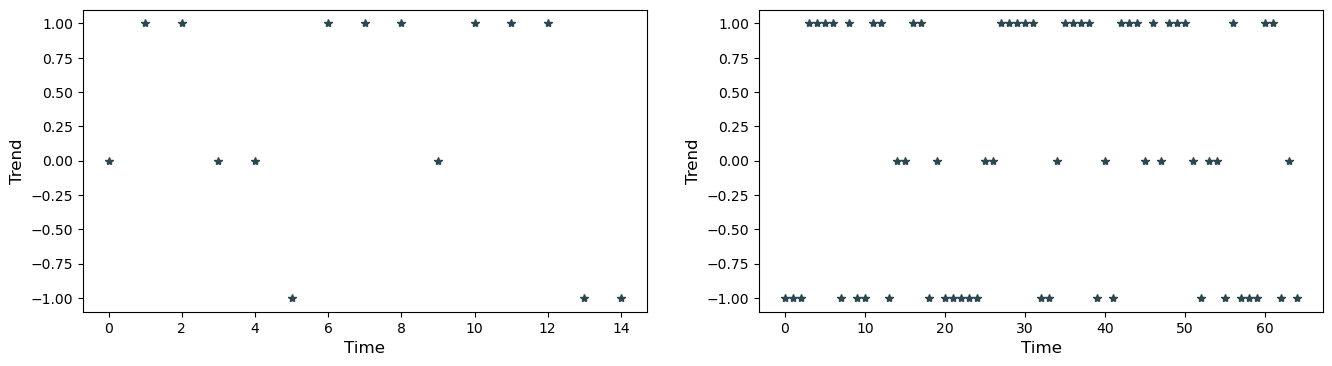

In [415]:

def gold_zhangdie(short_item, long_item, score, a):
    # 周黄金平均值
    count = 1
    temp3 = []
    while True:
        tp = data2.iloc[short_item*(count-1): short_item*count]["USD (PM)"].mean()
        count+= 1
        temp3.append(tp)
        if count >= len(data2)/short_item:
            break
    temp3_df = pd.DataFrame(temp3) # 252周的金价
    # 周平均金价图(中周期)
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = temp3_df.index
#     y = temp3_df.values
#     plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='week' )
#     ax.set_xticks( range(0,len(x),10))
#     ax.legend( loc=0, frameon=True )











    # 长期(20天)
    count = 1
    temp4_max = [] # 周高位点
    temp4_min = [] # 周低位点
    while True:
        tp_max = max(temp3[(count-1)*long_item:count*long_item])
        tp_min = min(temp3[(count-1)*long_item:count*long_item])
        temp4_max.append(tp_max)
        temp4_min.append(tp_min)
        count+=1
        if count >= len(temp3)/long_item:
            break
    temp4_max_h = amplitude(np.array(temp4_max)) # 周高位点
    temp4_min_l = amplitude(np.array(temp4_min)) # 周低位点
    #周趋势(同增同减同趋势，不同则未知)
    tptp = []
    for i,j in zip(temp4_max_h, temp4_min_l):
        if i > 0 and j > 0:
            tptp.append(1)
        elif i < 0 and j < 0:
            tptp.append(-1)
        else:
            tptp.append(0)
    tptp_w_g = pd.DataFrame(tptp) # 第二周开始的61周涨跌幅度表 -1跌+1涨
    #周趋势图(长期)
    fig = plt.figure( figsize=(16,4), dpi=100)
    plt.subplot(1,2,1)
    x = tptp_w_g.index
    y = tptp_w_g.values
    plt.plot( x, y,"r*", color=dt_hex )
    ax.set_xticks( range(2,len(x),10))
    ax.legend( loc=0, frameon=True )
    plt.xlabel('Time',fontsize=12)
    plt.ylabel('Trend',fontsize=12)
    plt.savefig("黄金长周期趋势点图.png")
    #plt.show()









    # # (15天)
    # count = 1
    # temp5_max = []
    # temp5_min = []
    # temp5_max_index = []
    # temp5_min_index = []
    # while True:
    #     tp_max = max(np.array(data2["USD (PM)"])[(count-1)*15:count*15])
    #     tp_min = min(np.array(data2["USD (PM)"])[(count-1)*15:count*15])
    #     temp5_max_index.append((count-1)*15+list(np.array(data2["USD (PM)"])[(count-1)*15:count*15]).index(tp_max))
    #     temp5_min_index.append((count-1)*15+list(np.array(data2["USD (PM)"])[(count-1)*15:count*15]).index(tp_min))
    #     temp5_max.append(tp_max)
    #     temp5_min.append(tp_min)
    #     count+=1
    #     if count >= len(data2)/15:
    #         break
    # temp5_max_h = amplitude(np.array(temp5_max))
    # temp5_min_l = amplitude(np.array(temp5_min))
    # #天趋势
    # tptp = []
    # temp5_max_value = []
    # temp5_min_value = []
    # temp5_max_index_real = []
    # temp5_min_index_real = []
    # count = 0
    # for i,j in zip(temp5_max_h, temp5_min_l):
    #     if i > 0 and j > 0:
    #         tptp.append(1)
    #         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
    #         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
    #         temp5_max_index_real.append(temp5_max_index[count])
    #         temp5_min_index_real.append(temp5_min_index[count])
    #     elif i < 0 and j < 0:
    #         tptp.append(-1)
    #         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
    #         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
    #         temp5_max_index_real.append(temp5_max_index[count])
    #         temp5_min_index_real.append(temp5_min_index[count])
    #     else:
    #         tptp.append(0)
    #     count += 1
    # tptp_d = pd.DataFrame(tptp)
    # # 点图
    # fig = plt.figure( figsize=(16,4), dpi=100)
    # ax = fig.add_subplot(1,1,1)
    # x = tptp_d.index
    # y = tptp_d.values
    # plot = ax.plot( x, y,"r*", color=dt_hex )
    # ax.set_xticks( range(2,len(x),10))
    # plt.show()
    # # 折线描点图
    # fig = plt.figure( figsize=(16,4), dpi=100)
    # ax = fig.add_subplot(1,1,1)
    # x = np.array(data2.index)[0:200]
    # y = np.array(data2["USD (PM)"])[0:200]
    # plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
    # plt.scatter(temp5_max_index_real[0:12], temp5_max_value[0:12], s=25, c='r') 
    # plt.scatter(temp5_min_index_real[0:12], temp5_min_value[0:12], s=25, c='b') 
    # ax.set_xticks( range(0,len(x),30))
    # plt.xlabel('x',fontsize=20)
    # plt.ylabel('y',fontsize=20)
    # plt.title('title',fontsize=25)
    # ax.legend( loc=0, frameon=True )
    # plt.savefig('天周期点图.png',dpi=600)
    # plt.show()





















    # 5天(一周趋势)
    count = 1
    temp5_max = []
    temp5_min = []
    # temp5_max_index = []
    # temp5_min_index = []
    while True:
        tp_max = max(np.array(data2["USD (PM)"])[(count-1)*short_item:count*short_item])
        tp_min = min(np.array(data2["USD (PM)"])[(count-1)*short_item:count*short_item])
    #     temp5_max_index.append((count-1)*5+list(np.array(data2["USD (PM)"])[(count-1)*5:count*5]).index(tp_max))
    #     temp5_min_index.append((count-1)*5+list(np.array(data2["USD (PM)"])[(count-1)*5:count*5]).index(tp_min))
        temp5_max.append(tp_max)
        temp5_min.append(tp_min)
        count+=1
        if count >= len(data2)/short_item:
            break
    temp5_max_h = amplitude(np.array(temp5_max))
    temp5_min_l = amplitude(np.array(temp5_min))
    #
    tptp = []
    # temp5_max_value = []
    # temp5_min_value = []
    # temp5_max_index_real = []
    # temp5_min_index_real = []
    count = 0
    for i,j in zip(temp5_max_h, temp5_min_l):
        if i > 0 and j > 0:
            tptp.append(1)
    #         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
    #         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
    #         temp5_max_index_real.append(temp5_max_index[count])
    #         temp5_min_index_real.append(temp5_min_index[count])
        elif i < 0 and j < 0:
            tptp.append(-1)
    #         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
    #         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
    #         temp5_max_index_real.append(temp5_max_index[count])
    #         temp5_min_index_real.append(temp5_min_index[count])
        else:
            tptp.append(0)
        count += 1
    tptp_5 = pd.DataFrame(tptp)
    #
    #fig = plt.figure( figsize=(16,4), dpi=100)
    plt.subplot(1,2,2)
    x = tptp_5.index
    y = tptp_5.values
    plt.plot( x, y,"r*", color=dt_hex )
    ax.set_xticks( range(2,len(x),10))
    plt.xlabel('Time',fontsize=12)
    plt.ylabel('Trend',fontsize=12)
    plt.savefig("黄金中周期趋势点图.png", dpi=600)
    plt.show()

gold_zhangdie(19, 4, 10000, 0.01)

In [416]:
tp = []
for i in tp_z[2][0]:
    tp.append(list(i))
pd.DataFrame(tp).to_csv('H.csv')

In [417]:
# # 折线描点图
# fig = plt.figure( figsize=(16,4), dpi=100)
# ax = fig.add_subplot(1,1,1)
# x = np.array(data2.index)
# y = np.array(data2["USD (PM)"])
# plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
# plt.scatter(temp6_in_index, temp6_in_value, s=25, c='r',label='in') 
# plt.scatter(temp6_out_index, temp6_out_value, s=25, c='b',label='out') 
# ax.set_xticks( range(0,len(x),100))
# plt.xlabel('x',fontsize=20)
# plt.ylabel('y',fontsize=20)
# plt.title('title',fontsize=25)
# ax.legend( loc=0, frameon=True )
# plt.savefig('黄金交易图.png',dpi=600)
# plt.show()

In [418]:
# output1.to_csv("道斯黄金.csv")

In [419]:
# # 模拟
# score = 10000
# ans = 0 #  手里黄金的盎司
# for i in status_dict:
#     ans = ans-(score/(1.01*np.array(data2)[i[0]][1]*i[1]))
# #     score = score+np.array(data2)[i[0]][1]*i[1] #i[0]*np.array(data2)[i[0]][1]*0.01
# ans*np.array(data2)[1221][1] # 第1221天

In [420]:
# 黄金




#########################################################################################################################################




# 比特币

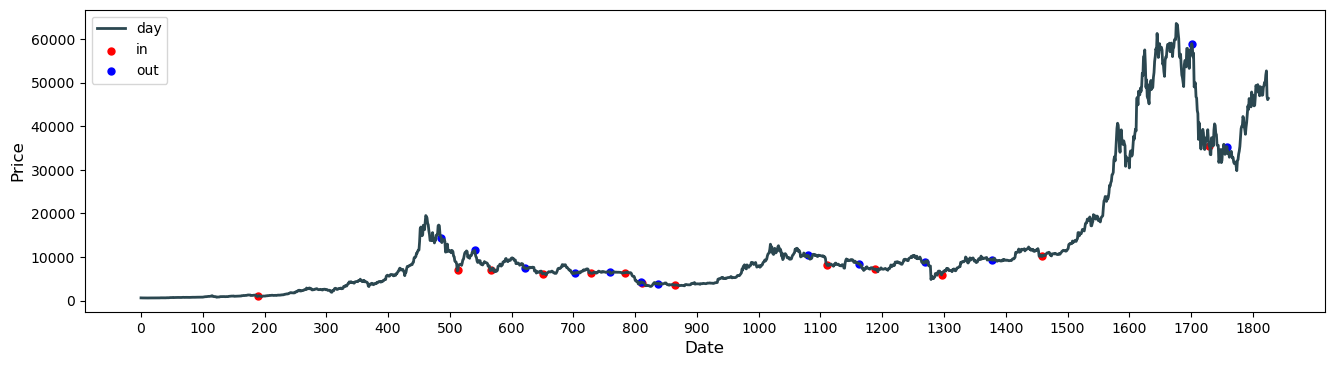

(9, 3, ([(189, -1, 967.69), (486, 1, 14437.42), (513, -1, 6925.46), (540, 1, 11516.83), (567, -1, 6937.56), (621, 1, 7576.78), (650, -1, 6141.605833), (703, 1, 6362.676923), (729, -1, 6240.98), (759, 1, 6626.85), (783, -1, 6390.42), (810, 1, 4278.77), (811, -1, 4116.7775), (837, 1, 3848.21), (865, -1, 3566.4), (1080, 1, 10360.28), (1111, -1, 8055.64), (1163, 1, 8503.93), (1188, -1, 7189.16), (1269, 1, 8912.82), (1296, -1, 5885.41), (1377, 1, 9380.03), (1459, -1, 10121.52), (1701, 1, 58928.81), (1729, -1, 35530.38), (1758, 1, 35309.3)], 3878233.0105379955))


In [421]:
def bitcoin(short_item, long_item, score, a):
    # 5天(比特币一周趋势)
    count = 1
    temp7_max = []
    temp7_min = []
    # temp7_max_index = []
    # temp7_min_index = []
    while True:
        tp_max = max(np.array(data1["Value"])[(count-1)*short_item:count*short_item])
        tp_min = min(np.array(data1["Value"])[(count-1)*short_item:count*short_item])
    #     temp7_max_index.append((count-1)*7+list(np.array(data1["Value])[(count-1)*7:count*7]).index(tp_max))
    #     temp7_min_index.append((count-1)*7+list(np.array(data1["Value"])[(count-1)*7:count*7]).index(tp_min))
        temp7_max.append(tp_max)
        temp7_min.append(tp_min)
        count+=1
        if count >= len(data1)/short_item:
            break
    temp7_max_h = amplitude(np.array(temp7_max))
    temp7_min_l = amplitude(np.array(temp7_min))
    #
    tptp = []
    # temp7_max_value = []
    # temp7_min_value = []
    # temp7_max_index_real = []
    # temp7_min_index_real = []
    count = 0
    for i,j in zip(temp7_max_h, temp7_min_l):
        if i > 0 and j > 0:
            tptp.append(1)
    #         temp7_max_value.append(np.array(data1.loc[[temp7_max_index[count]],["Value"]])[0])
    #         temp7_min_value.append(np.array(data1.loc[[temp7_min_index[count]],[["Value"]])[0])
    #         temp7_max_index_real.append(temp7_max_index[count])
    #         temp7_min_index_real.append(temp7_min_index[count])
        elif i < 0 and j < 0:
            tptp.append(-1)
    #         temp7_max_value.append(np.array(data1.loc[[temp7_max_index[count]],["Value"]])[0])
    #         temp7_min_value.append(np.array(data1.loc[[temp7_min_index[count]],["Value"]])[0])
    #         temp7_max_index_real.append(temp7_max_index[count])
    #         temp7_min_index_real.append(temp7_min_index[count])
        else:
            tptp.append(0)
        count += 1
    tptp_7 = pd.DataFrame(tptp)
    #
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = tptp_7.index
#     y = tptp_7.values
#     plot = ax.plot( x, y,"r*", color=dt_hex )
#     ax.set_xticks( range(2,len(x),10))
    # plt.show()








    # 周比特币平均值
    count = 1
    temp8 = []
    while True:
        tp = data1.iloc[short_item*(count-1): short_item*count]["Value"].mean()
        count+= 1
        temp8.append(tp)
        if count >= len(data1)/short_item:
            break
    temp8_df = pd.DataFrame(temp8) # 252周的比特币价
    # 周平均比特币图
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = temp8_df.index
#     y = temp8_df.values
#     plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='week' )
#     ax.set_xticks( range(0,len(x),10))
#     ax.legend( loc=0, frameon=True )
    # plt.show()
    # 长期(28天)
    count = 1
    temp8_max = [] # 周高位点
    temp8_min = [] # 周低位点
    while True:
        tp_max = max(temp8[(count-1)*long_item:count*long_item])
        tp_min = min(temp8[(count-1)*long_item:count*long_item])
        temp8_max.append(tp_max)
        temp8_min.append(tp_min)
        count+=1
        if count >= len(temp8)/long_item:
            break
    temp8_max_h = amplitude(np.array(temp8_max)) # 周涨幅
    temp8_min_l = amplitude(np.array(temp8_min)) # 周跌幅
    #周趋势(同增通减同趋势，不同则未知)
    tptp = []
    for i,j in zip(temp8_max_h, temp8_min_l):
        if i > 0 and j > 0:
            tptp.append(1)
        elif i < 0 and j < 0:
            tptp.append(-1)
        else:
            tptp.append(0)
    tptp_w_b = pd.DataFrame(tptp) # 第二周开始的61周涨跌幅度表 -1跌+1涨
    #周趋势图(长期)
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = tptp_w_b.index
#     y = tptp_w_b.values
#     plot = ax.plot( x, y,"r*", color=dt_hex )
#     ax.set_xticks( range(2,len(x),10))
    # ax.legend( loc=0, frameon=True )
    # plt.show()










    # 第一个28天
    # 买入-1 卖出+1
    status = 0 # 上一周的涨跌
    status_dict = [] # (日期，买入还是卖出)
    day = 0
    for i in range(long_item):
        if i == 0: # 第二周
            status_first_7 = np.array(tptp_w_b)[0][0]
            if status_first_7 < 0:
                status = -1 # 跌
            elif status_first_7 > 0:
                status = 1 # 涨
            else:
                status = 0 
        else: # 第三周以后28天以内
            for j in range(short_item):
                day = short_item*i+j+short_item-1
                if status_dict == []: # 没有任何买入时
                    if status == 1:
                        status = np.array(tptp_w_b)[i-1][0]
                        continue
                    elif status == -1 and day_b_amp[day] > 0:
                        status_dict.append((day, -1, np.array(data1)[day][1])) # 买入
                        status = np.array(tptp_w_b)[i-1][0]
                        break
                else: # 有买入后
                    #  上周涨跌判断      本周每日涨跌幅        上笔交易买卖情况   
                    if status == -1 and day_b_amp[day] > 0 and status_dict[-1][1] >= 0: # 上一笔是卖出才能买入
                        status_dict.append((day, -1, np.array(data1)[day][1])) # 买入
                        status = np.array(tptp_w_b)[i-1][0]
                        break
                    elif status == -1 and day_b_amp[day] < 0 and status_dict[-1][1] <= 0: # 上一笔是买入才能卖出
                        status_dict.append((day, 1, np.array(data1)[day][1])) # 卖出
                        status = np.array(tptp_w_b)[i-1][0]
                        break
    # status_dict












    # 第二个月以及后面
    for k in range(len(tptp_w_b)):
        if np.array(tptp_w_b)[k][0] == 0:
            status = np.array(tptp_w_b)[k-1][0]
        else:
            status = np.array(tptp_w_b)[k][0]
        for i in range(long_item):
            for j in range(short_item):
                day = short_item*long_item*(k+1)+short_item*i+j
                if status_dict == []:# 前期无交易
                    if status == -1 and day_b_amp[day] > 0: # 上一笔是卖出才能买入或无上一笔可买入
                        status_dict.append((day, -1, np.array(data1)[day][1])) # 买入
                        status = np.array(tptp_w_b)[i-1][0]
                        break
                    elif status == 1 and day_b_amp[day] < 0: # 上一笔是买入才能卖出，无上一笔的不能卖
                        status = np.array(tptp_w_b)[i-1][0]
                        continue
                else:# 前期有交易
                    # 跌幅超过10%交易避免赔本
                    if status == -1 and ((np.array(data1)[day][1]-status_dict[-1][-1])/status_dict[-1][-1]) <= -0.1 and status_dict[-1][1] <= 0:
                        status_dict.append((day, 1, np.array(data1)[day][1])) # 卖出
                        continue
                    if status == -1 and day_b_amp[day] > 0 and status_dict[-1][1] >= 0: # 上一笔是卖出才能买入
                        status_dict.append((day, -1, np.array(data1)[day][1])) # 买入
                        status = np.array(tptp_w_b)[i-1][0]
                        break
                    elif status == -1 and day_b_amp[day] < 0 and status_dict[-1][1] <= 0: # 上一笔是买入才能卖出
                        status_dict.append((day, 1, np.array(data1)[day][1])) # 卖出
                        status = np.array(tptp_w_b)[i-1][0]
                        break

    # status_dict









    # 保存 交易日期 交易情况 交易当日金价
    temp9 = []
    temp9_in_index = []
    temp9_in_value = []
    temp9_out_index = []
    temp9_out_value = []
    for i in status_dict:
        temp9.append([i[0], i[1], np.array(data1)[i[0]][1]])
        if i[1] == -1:
            temp9_in_index.append(i[0])
            temp9_in_value.append(i[2])
        elif i[1] == 1:
            temp9_out_index.append(i[0])
            temp9_out_value.append(i[2])
    output1 = pd.DataFrame(temp9, columns=["Date", "process", "price"])
    # output1









    ### 收益计算 final_zhuan
    temp9_zhuan = []
    # for i,j in zip(temp9_in_value, temp9_out_value):
    #     temp9_zhuan.append(j-i)
    #     print(j-i)
    # 模拟本金
    ans = 0 #  手里比特币颗数
    count = 1
    for i in status_dict:
        if count%2 == 0:
            #print(ans*np.array(data1)[i[0]][1])
            score = (1-a)*ans*np.array(data1)[i[0]][1]
            ans = 0
            temp9_zhuan.append(score)
        else:
            ans = ans-(score/((1+a)*np.array(data1)[i[0]][1]*i[1]))
            score = 0
        count += 1
    final_zhuan = temp9_zhuan[-1]-10000
    if ans != 0:
        final_zhuan += (1-a)*ans*np.array(data1)[-1][1]
    # print("最终收益: {}".format(final_zhuan))
    # 折线描点图
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = np.linspace(0, len(temp9_zhuan), len(temp9_zhuan))
#     y = np.array(temp9_zhuan)
#     plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
#     ax.set_xticks( range(0,len(x),100))
#     plt.xlabel('x',fontsize=20)
#     plt.ylabel('y',fontsize=20)
#     plt.title('title',fontsize=25)
#     ax.legend( loc=0, frameon=True )
    # plt.show()
    return status_dict, final_zhuan

# bitcoin(7,4)
temp_zz = []
for i in range(5, 20): # 中期
    for j in range(2, 5): # 多少中期为长期
        a2 = 0.02
        temp_zz.append((i,j,bitcoin(i, j, 10000, a2)))
temp_zzz = 0
for i in temp_zz:
    if temp_zzz > i[2][-1]:
        continue
    elif temp_zzz <= i[2][-1]:
        temp_zzz = i[2][-1]
        tp_z = i
# # 折线描点图
temp9_in_index = []
temp9_in_value = []
temp9_out_index = []
temp9_out_value = []
for i in tp_z[2][0]:
    if i[1] == -1:
        temp9_in_index.append(i[0])
        temp9_in_value.append(i[2])
    elif i[1] == 1:
        temp9_out_index.append(i[0])
        temp9_out_value.append(i[2])
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = np.array(data1.index)
y = np.array(data1["Value"])
plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
plt.scatter(temp9_in_index, temp9_in_value, s=25, c='r',label='in') 
plt.scatter(temp9_out_index, temp9_out_value, s=25, c='b',label='out') 
ax.set_xticks( range(0,len(x),100))
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price',fontsize=12)
ax.legend( loc=0, frameon=True )
plt.savefig('比特币交易图.png',dpi=600)
plt.show()
print(tp_z)


In [422]:
tp = []
for i in tp_z[2][0]:
    tp.append(list(i))
pd.DataFrame(tp).to_csv('B.csv')

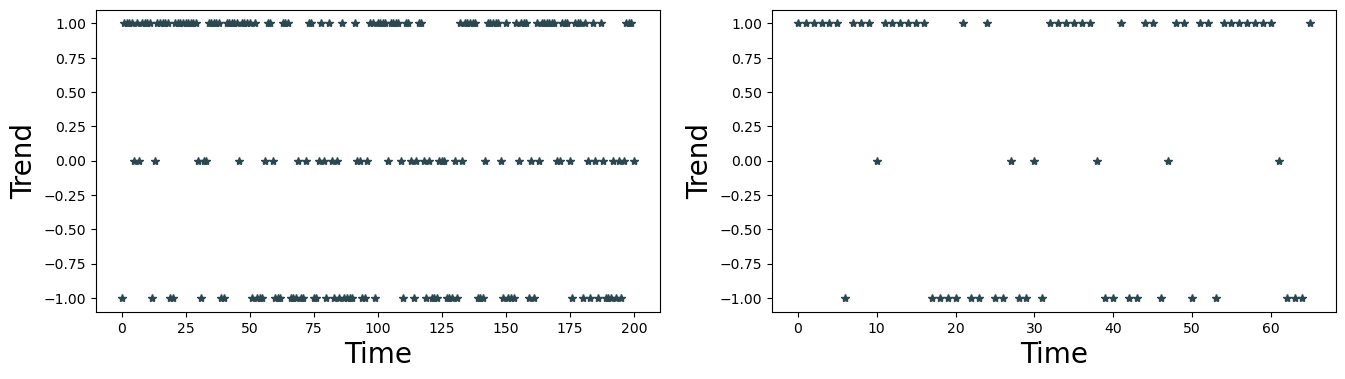

In [423]:
def bitcoin_zhangdie(short_item, long_item, score, a):
    # 5天(比特币一周趋势)
    count = 1
    temp7_max = []
    temp7_min = []
    # temp7_max_index = []
    # temp7_min_index = []
    while True:
        tp_max = max(np.array(data1["Value"])[(count-1)*short_item:count*short_item])
        tp_min = min(np.array(data1["Value"])[(count-1)*short_item:count*short_item])
    #     temp7_max_index.append((count-1)*7+list(np.array(data1["Value])[(count-1)*7:count*7]).index(tp_max))
    #     temp7_min_index.append((count-1)*7+list(np.array(data1["Value"])[(count-1)*7:count*7]).index(tp_min))
        temp7_max.append(tp_max)
        temp7_min.append(tp_min)
        count+=1
        if count >= len(data1)/short_item:
            break
    temp7_max_h = amplitude(np.array(temp7_max))
    temp7_min_l = amplitude(np.array(temp7_min))
    #
    tptp = []
    # temp7_max_value = []
    # temp7_min_value = []
    # temp7_max_index_real = []
    # temp7_min_index_real = []
    count = 0
    for i,j in zip(temp7_max_h, temp7_min_l):
        if i > 0 and j > 0:
            tptp.append(1)
    #         temp7_max_value.append(np.array(data1.loc[[temp7_max_index[count]],["Value"]])[0])
    #         temp7_min_value.append(np.array(data1.loc[[temp7_min_index[count]],[["Value"]])[0])
    #         temp7_max_index_real.append(temp7_max_index[count])
    #         temp7_min_index_real.append(temp7_min_index[count])
        elif i < 0 and j < 0:
            tptp.append(-1)
    #         temp7_max_value.append(np.array(data1.loc[[temp7_max_index[count]],["Value"]])[0])
    #         temp7_min_value.append(np.array(data1.loc[[temp7_min_index[count]],["Value"]])[0])
    #         temp7_max_index_real.append(temp7_max_index[count])
    #         temp7_min_index_real.append(temp7_min_index[count])
        else:
            tptp.append(0)
        count += 1
    tptp_7 = pd.DataFrame(tptp)
    #
    fig = plt.figure( figsize=(16,4), dpi=100)
    plt.subplot(1,2,1)
    x = tptp_7.index
    y = tptp_7.values
    plt.plot( x, y,"r*", color=dt_hex )
    ax.set_xticks( range(2,len(x),100))
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('Trend',fontsize=20)
    #plt.savefig("比特币中周期趋势点图.png")
    #plt.show()








    # 周比特币平均值
    count = 1
    temp8 = []
    while True:
        tp = data1.iloc[short_item*(count-1): short_item*count]["Value"].mean()
        count+= 1
        temp8.append(tp)
        if count >= len(data1)/short_item:
            break
    temp8_df = pd.DataFrame(temp8) # 252周的比特币价
    # 周平均比特币图
#     fig = plt.figure( figsize=(16,4), dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     x = temp8_df.index
#     y = temp8_df.values
#     plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='week' )
#     ax.set_xticks( range(0,len(x),10))
#     ax.legend( loc=0, frameon=True )
    # plt.show()
    # 长期(28天)
    count = 1
    temp8_max = [] # 周高位点
    temp8_min = [] # 周低位点
    while True:
        tp_max = max(temp8[(count-1)*long_item:count*long_item])
        tp_min = min(temp8[(count-1)*long_item:count*long_item])
        temp8_max.append(tp_max)
        temp8_min.append(tp_min)
        count+=1
        if count >= len(temp8)/long_item:
            break
    temp8_max_h = amplitude(np.array(temp8_max)) # 周涨幅
    temp8_min_l = amplitude(np.array(temp8_min)) # 周跌幅
    #周趋势(同增通减同趋势，不同则未知)
    tptp = []
    for i,j in zip(temp8_max_h, temp8_min_l):
        if i > 0 and j > 0:
            tptp.append(1)
        elif i < 0 and j < 0:
            tptp.append(-1)
        else:
            tptp.append(0)
    tptp_w_b = pd.DataFrame(tptp) # 第二周开始的61周涨跌幅度表 -1跌+1涨
    #周趋势图(长期)
    #fig = plt.figure( figsize=(16,4), dpi=100)
    plt.subplot(1,2,2)
    x = tptp_w_b.index
    y = tptp_w_b.values
    plt.plot( x, y,"r*", color=dt_hex )
    ax.set_xticks( range(2,len(x),10))
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('Trend',fontsize=20)
    ax.legend( loc=0, frameon=True )
    plt.savefig("比特币长周期趋势点图.png")
    plt.show()

bitcoin_zhangdie(9, 3, 10000, 0.02)

In [424]:
# # 折线描点图
# fig = plt.figure( figsize=(16,4), dpi=100)
# ax = fig.add_subplot(1,1,1)
# x = np.array(data1.index)
# y = np.array(data1["Value"])
# plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
# plt.scatter(temp9_in_index, temp9_in_value, s=25, c='r',label='in') 
# plt.scatter(temp9_out_index, temp9_out_value, s=25, c='b',label='out') 
# ax.set_xticks( range(0,len(x),100))
# plt.xlabel('x',fontsize=20)
# plt.ylabel('y',fontsize=20)
# plt.title('title',fontsize=25)
# ax.legend( loc=0, frameon=True )
# plt.savefig('比特币交易图.png',dpi=600)
# plt.show()

In [425]:
# output1.to_csv("道斯比特币.csv")

In [426]:
# # 模拟
# score = 10000
# ans = 0 #  手里比特币颗数
# for i in status_dict:
#     ans = ans-(score/(1.02*np.array(data1)[i[0]][1]*i[1]))
# #     score = score+np.array(data2)[i[0]][1]*i[1] #i[0]*np.array(data2)[i[0]][1]*0.01
# ans*np.array(data1)[1716][1] # 第1716天

In [427]:
# 先向前取值填充，再先后取值填充
zdata = pd.merge(data1, data2, how='outer').fillna(method='ffill').fillna(method='backfill')
zdata.to_csv("price.csv")

In [428]:
def Rt(Pt):
    Rt = []
    p1 = np.array(Pt.copy()[1:])
    p2 = np.array(Pt.copy()[:-1])
    count = 0
    for i,j in zip(p1, p2):
        count+=1
        rt = 0
        if count <= 60:
            for k in range(count):
                rt = rt + (p1[count-1]-p2[count-1])/p2[count-1]
        else:
            for k in range(60):
                rt = rt + (p1[count-k-1]-p2[count-k-1])/p2[count-k-1]
        Rt.append(rt)
    return Rt

def ERt(Rt):
    ERt = []
    n = len(Rt)
    for i in range(1,n+1):
        ERt.append(np.array(list(Rt[0:i])).sum()/i)
    return ERt

def Dt(Rt):
    DRt = []
    n = len(Rt)
    count = 0
    for i in range(1,n+1):
#         tpd = 0
#         for j in range(1,i):
#             tpd = tpd+(Rt[j]-ERt(Rt[0:i])[-1])**2
#         DRt.append(tpd/(i-1))
        count += 1
        if count <= 60:
            DRt.append(np.std(Rt[0:i],ddof = 1))
        else:
            DRt.append(np.std(Rt[i-60:i],ddof = 1))
    return DRt

Rgt = Rt(zdata["USD (PM)"])
ERgt = ERt(Rgt)
DRgt = Dt(Rgt)
Rbt = Rt(zdata["Value"])
ERbt = ERt(Rbt)
DRbt = Dt(Rbt)

D:\Anaconda\envs\python32\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda\envs\python32\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [429]:
len(Rgt)

1825

In [430]:
pd.DataFrame([Rgt,DRgt,Rbt,DRbt]).T[0:10]

,0,1,2,3
0,0.000000,NaN,-0.019271,NaN
1,-0.001434,0.001014,0.004101,0.016526
2,-0.004306,0.002193,-0.010312,0.011792
3,-0.033138,0.015714,0.010249,0.013436
4,-0.009345,0.013610,-0.010403,0.012004
5,0.000000,0.012794,-0.020390,0.012414
6,0.000000,0.012068,0.052352,0.025360
7,0.039745,0.019917,-0.018182,0.024429
8,-0.007187,0.018742,-0.022567,0.023908
9,0.093622,0.034952,-0.160681,0.054483


In [431]:
#                          金R   币R  金标  币标
tpp = []
m_list = []
a1 = 0.01
a2 = 0.02
for m in [(i+1)/10 for i in range(10)]:
    tp = []
    for rg,rb,dg,db in zip(Rgt[1:], Rbt[1:], DRgt[1:], DRbt[1:]):
        #rx = (rg-0.01)*x1+(rb-0.02)*x2
        #dg*x1+db*x2<=0.22
        #(1+0.01)*x1+(1+0.02)*x2=1
        #x1,x2>0
    #     c = np.array([-(rg-0.01), -(rb-0.02)])
        A_ub = np.array([[dg, db]])  # 不等式约束
        b_ub = np.array([0.22])
        c = np.array([-m*(rg-a1)+(1-m)*dg, -m*(rb-a2)+(1-m)*db])
        A_eq = np.array([[1+a1, 1+a2]])                # 等式约束
        b_eq = np.array([1])
        r = linprog(c , A_ub, b_ub, A_eq, b_eq, bounds=((0, None), (0, None)))#, method='simplex'#
        if dict(r)['success'] == True:
#             print(dict(r)['fun'],dict(r)['x'])
            tp.append(dict(r)['x'])
        else:
            print("error")
    pd.DataFrame(tp).to_csv("temp.csv")
    
    # 计算收益
    np.set_printoptions(suppress=True)
    B = pd.read_csv(r'B.csv') # B
    H = pd.read_csv(r'H.csv') # H
    Times = pd.read_csv(r'temp.csv') # Time
    B = B.set_index("Unnamed: 0")
    H = H.set_index("Unnamed: 0")
    Times = Times.set_index("Unnamed: 0")
    # 先向前取值填充，再先后取值填充
    BH = pd.merge(H.iloc[:,0:2], B.iloc[:,0:2], how='outer',on='0').sort_values('0',ascending=True)
    BH = pd.merge(BH, H.iloc[:,0:3:2], how="left", on=["0"])
    BH = pd.merge(BH, B.iloc[:,0:3:2], how="left", on=["0"]).fillna(0)
    m = 1000
    h = 0
    b = 0
    p = 0
    q = 0
    control_list = []
    for i in range(len(Times)):
        x1 = 0
        x2 = 0
        j = 0
        t = 0
        if i <= 9:
            control_list.append([i,0,m,h,j,b,t,x1,x2])
            continue
        else:
            if i not in list(np.array(BH['0'])):
                control_list.append([i,0,m,h,j,b,t,x1,x2])
                continue
        if np.array(BH[BH['0'].isin([str(i)])]['1_x'])[0] != 0: # H
    #         if np.array(BH[BH['0'].isin([str(i)])]['2_y'])[0] == 0: # B
            if np.array(BH[BH['0'].isin([str(i)])]['1_x'])[0] < 0: # 买
                j = np.array(H[H['0'].isin([i])]['2'])[0]
                x1 = np.array(Times.iloc[[i]]['0'])[0]
                x2 = np.array(Times.iloc[[i]]['1'])[0]
                p = m*x1#(x1/(x1+x2))
                q = m*x2#(x2/(x1+x2))
                h = (p-0.01*p)/j
                p = 0
                m = p + q
                control_list.append([i,11,m,h,j,b,0,x1,x2])
    #             print(m)
            if np.array(BH[BH['0'].isin([str(i)])]['1_x'])[0] > 0: # 卖
                j = np.array(H[H['0'].isin([i])]['2'])[0]
                x1 = np.array(Times.iloc[[i]]['0'])[0]
                x2 = np.array(Times.iloc[[i]]['1'])[0]
                p = m*x1
                q = m*x2
                m = h*j-h*j*0.01+p+q
                h = 0
                control_list.append([i,-11,m,h,j,b,0,x1,x2])
    #             print(m)

    #             if np.array(BH[BH['0'].isin([str(i)])]['2_x'])[0] == 0: # H
        if np.array(BH[BH['0'].isin([str(i)])]['1_y'])[0] != 0: # B
            if np.array(BH[BH['0'].isin([str(i)])]['1_y'])[0] < 0: # 买
                t = np.array(B[B['0'].isin([i])]['2'])[0]
                x1 = np.array(Times.iloc[[i]]['0'])[0]
                x2 = np.array(Times.iloc[[i]]['1'])[0]
                p = m*x1#(x1/(x1+x2))
                q = m*x2#(x2/(x1+x2))
                b = (q-0.02*q)/t
                q = 0
                m = p + q
                control_list.append([i,22,m,h,0,b,t,x1,x2])
    #             print(m)
            elif np.array(BH[BH['0'].isin([str(i)])]['1_y'])[0] > 0: # 卖
                t = np.array(B[B['0'].isin([i])]['2'])[0]
                x1 = np.array(Times.iloc[[i]]['0'])[0]
                x2 = np.array(Times.iloc[[i]]['1'])[0]
                p = m*x1
                q = m*x2
                m = b*t-b*t*0.02+p+q
                b = 0
                control_list.append([i,-22,m,h,0,b,t,x1,x2])
    print(m)
    m_list.append(m)
    tpp.append(tp)
    if m == max(m_list):
        cp = tp.copy()

1.5341490324511317e-07
13355.311933987936
13355.316492107382
13224.381909615571
13018.555127669617
72087.61420997653
67289.02306787031
67289.0214488072
67289.02289644151
67289.02351520825


In [432]:
# 拼接
cct = []
bc = [i[1] for i in cp]
hc = [i[0] for i in cp]
bcd = pd.concat([pd.DataFrame(np.array(data1["Date"][2:]),columns=["Date"]), pd.DataFrame(bc)],axis=1)
bcd = pd.concat([bcd, pd.DataFrame(hc, columns=["1"])],axis=1)
for i in np.array(bcd["Date"]):
    if str(i) not in np.array(data2["Date"]):
        x1 = np.array(bcd[bcd['Date'].isin([str(i)])])[0][1] # b
        data_b = np.array(day_b_amp_b[day_b_amp_b['Date'].isin([str(i)])])[0][1]
        cct.append([i,x1*data_b])
    else:
        x1 = np.array(bcd[bcd['Date'].isin([str(i)])])[0][1] # b
        x2 = np.array(bcd[bcd['Date'].isin([str(i)])])[0][2] # h
        data_b = np.array(day_b_amp_b[day_b_amp_b['Date'].isin([str(i)])])[0][1]
        data_h = np.array(day_g_amp_g[day_g_amp_g['Date'].isin([str(i)])])[0][1]
        cct.append([i,x1*data_b+x2*data_h])

In [433]:
# bcd.to_csv("bcd.csv")
bcd[0:100]

,Date,0,1
0,9/13/16,9.955559e-09,9.900990e-01
1,9/14/16,8.681865e-12,9.900990e-01
2,9/15/16,9.803922e-01,2.956531e-10
3,9/16/16,4.800950e-08,9.900990e-01
4,9/17/16,6.381767e-12,9.900990e-01
...,...,...,...
95,12/17/16,2.534639e-11,9.900990e-01
96,12/18/16,3.448482e-11,9.900990e-01
97,12/19/16,3.676633e-11,9.900990e-01
98,12/20/16,5.439868e-02,9.351617e-01


In [434]:
# 在线组合投资策略SR
SRz = []
cct = np.array(pd.DataFrame(cct).set_index(0))
y1 = cct[0:110]
y2 = cct[111:475]
y3 = cct[475:840]
y4 = cct[840:1205]
y5 = cct[1205:1571]
y6 = cct[1571:]
y = [y1,y2,y3,y4,y5,y6]
for i in y:
    ym = np.array(i).mean()
    yd = np.std(np.array(i),ddof = 1)
    SRz.append(ym/yd)
print(SRz)

[0.12627760490052334, 0.18066721433635508, 0.006387364409278252, 0.11830503471966762, 0.16092710155261009, 0.15214449153644669]


In [435]:
cct

array([[-0.0007101 ],
       [-0.00142121],
       [ 0.00251209],
       ...,
       [-0.0973831 ],
       [-0.01414734],
       [ 0.00607063]])

In [436]:
SRg = np.round(SRg,decimals=4)
SRb = np.round(SRb,decimals=4)
SR055 = np.round(SR055,decimals=4)
SRz = np.round(SRz,decimals=4)
pd.DataFrame([SRg, SRb, SR055, SRz], index=["g","b","5g5b","gb"]).T.to_csv("SR.csv")

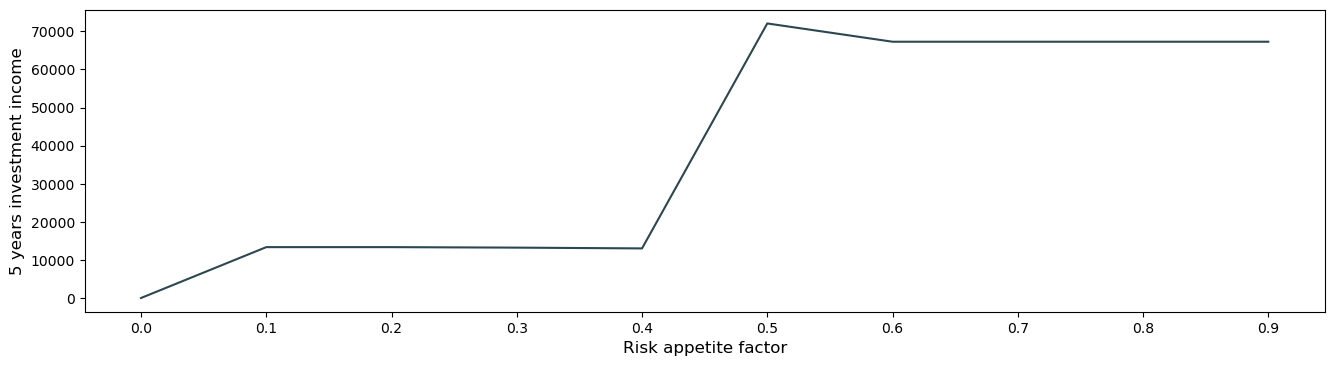

In [437]:
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
# plt.rcParams['axes.unicode_minus'] = False 
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = np.array([i/10 for i in range(len(m_list))])
y = np.array(m_list)
plot = ax.plot( x, y, color=dt_hex)
ax.set_xticks([i/10 for i in range(len(m_list))])
plt.xlabel('Risk appetite factor',fontsize=12)
plt.ylabel('5 years investment income',fontsize=12)
plt.savefig('风险收益图.png',dpi=600)
plt.show()

In [438]:
len(tpp)

10

In [439]:
pd.DataFrame(tpp[3])

,0,1
0,9.900990e-01,9.179798e-12
1,9.900990e-01,1.332468e-11
2,2.355041e-11,9.803922e-01
3,9.900986e-01,3.751610e-07
4,9.900990e-01,3.549778e-11
...,...,...
1819,1.802604e-01,8.018990e-01
1820,1.516702e-01,8.302089e-01
1821,1.167487e-01,8.647880e-01
1822,6.930200e-02,9.117696e-01


In [440]:
data2.set_index("Date")

,USD (PM)
Date,
9/12/16,1324.60
9/13/16,1323.65
9/14/16,1321.75
9/15/16,1310.80
9/16/16,1308.35
...,...
9/6/21,1821.60
9/7/21,1802.15
9/8/21,1786.00


In [441]:
# for i in tpp:
ppt = []
for i in tpp:
    ppt.append(pd.DataFrame(i))
ppt.append(pd.DataFrame(np.array(data1["Date"][2:]),columns=["Date"]))
pd.concat(ppt,axis=1).set_index(["Date"]).to_csv("m10.csv")

In [442]:
# cct2 = pd.merge(cct, data2.set_index("Date"),how="left", on=["Date"])
# cct2

In [443]:
# temp_row = []
# for index, row in cct2.iterrows():
#     if np.isnan(row["USD (PM)"]) == True:
#         lll = [index]
#         for l in row.iteritems():
#             if l[0] == 1:
#                 ll = 0
#             elif l[0] == 0:
#                 ll = 1
#             else:
#                 ll = l[0]
#             lll.append(ll)
#         pd.DataFrame(np.array(lll)).T.set_index(0)